# Introduction


Use the Credit Score Classification dataset provided [here](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)




# `01` Import Necessary Libraries

## `i` Default Libraries

In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries

In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MultiLabelBinarizer,OrdinalEncoder,StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
np.random.seed = 1234

----------------------------

# `02` Load & Split Data


In [58]:
train = pd.read_csv(r'O:\iti\12) Deep learning\Labs\lab 2\train.csv')

C:\Users\Omar Elgema3y\AppData\Local\Temp\ipykernel_2812\3636984635.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(r'O:\iti\12) Deep learning\Labs\lab 2\train.csv')


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis





In [59]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [60]:
train.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x25fd5,1
Customer_ID,100000,12500,CUS_0x942c,8
Month,100000,8,January,12500
Name,90015,10139,Stevex,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,17273.83,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [61]:
train.duplicated().sum()

np.int64(0)

- NO duplicated data

In [62]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

- there are some nulls in data


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

- there are some data expected to be numbers but they are object

In [64]:
train.Age.value_counts(ascending=False)

Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
6618       1
3155       1
5063       1
2875       1
4347       1
Name: count, Length: 1788, dtype: int64

- there are nonlogical values

In [65]:
train["Changed_Credit_Limit"].value_counts()

Changed_Credit_Limit
_                    2091
8.22                  133
11.5                  127
11.32                 126
7.35                  121
                     ... 
30.16                   1
4.710000000000001       1
-4.39                   1
27.38                   1
16.63                   1
Name: count, Length: 4384, dtype: int64

- negative values

In [66]:
train["Monthly_Balance"].value_counts()

Monthly_Balance
__-333333333333333333333333333__    9
328.655224                          1
432.559318                          1
470.69062692529184                  1
393.673696                          1
                                   ..
300.008498                          1
396.997157                          1
368.154976                          1
412.669312                          1
895.494583180492                    1
Name: count, Length: 98792, dtype: int64

- negative values

In [67]:
train["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

- there are ( !@9#%8  ) in data

In [68]:
train["Occupation"].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

- there are ( _______ ) in data

In [69]:
train["Month"].value_counts()

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

- Does not include all months

In [70]:
train["Num_Bank_Accounts"].value_counts(ascending=False)

Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1091        1
1123        1
1657        1
299         1
1240        1
Name: count, Length: 943, dtype: int64

In [71]:
train[train["Num_Bank_Accounts"] > 100]["Num_Bank_Accounts"].value_counts()

Num_Bank_Accounts
803     7
1668    5
105     5
791     5
210     4
       ..
463     1
453     1
472     1
636     1
1703    1
Name: count, Length: 882, dtype: int64

In [72]:
train[train["Num_Bank_Accounts"] < 0 ]["Num_Bank_Accounts"].value_counts()

Num_Bank_Accounts
-1    21
Name: count, dtype: int64

- there are outliers
- there are negative values

In [73]:
train["Num_Credit_Card"].value_counts()

Num_Credit_Card
5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
1405        1
708         1
62          1
343         1
481         1
Name: count, Length: 1179, dtype: int64

- there are outliers

In [74]:
train["Num_Credit_Inquiries"].value_counts()

Num_Credit_Inquiries
4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1618.0        1
758.0         1
735.0         1
2483.0        1
1960.0        1
Name: count, Length: 1223, dtype: int64

- there are outliers

In [75]:
train["Amount_invested_monthly"].value_counts()

Amount_invested_monthly
__10000__             4305
0.0                    169
167.1638651610451        1
80.41529543900253        1
118.28022162236736       1
                      ... 
215.48638555294247       1
78.49772657092517        1
147.33990786653956       1
82.82557214415213        1
42.935565846112745       1
Name: count, Length: 91049, dtype: int64

there are ( __ 10000__ ) in data

In [76]:
train["Credit_Mix"].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

- there are ( _ ) must be handeled

In [77]:
train["Type_of_Loan"].value_counts()

Type_of_Loan
Not Specified                                                                                        1408
Credit-Builder Loan                                                                                  1280
Personal Loan                                                                                        1272
Debt Consolidation Loan                                                                              1264
Student Loan                                                                                         1240
                                                                                                     ... 
Auto Loan, Payday Loan, Auto Loan, Student Loan, Student Loan, Student Loan, and Home Equity Loan       8
Home Equity Loan, Payday Loan, Not Specified, and Personal Loan                                         8
Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan                                                   8
Payday Loan, Student Loan, Mortga

## `ii` Visual Analysis


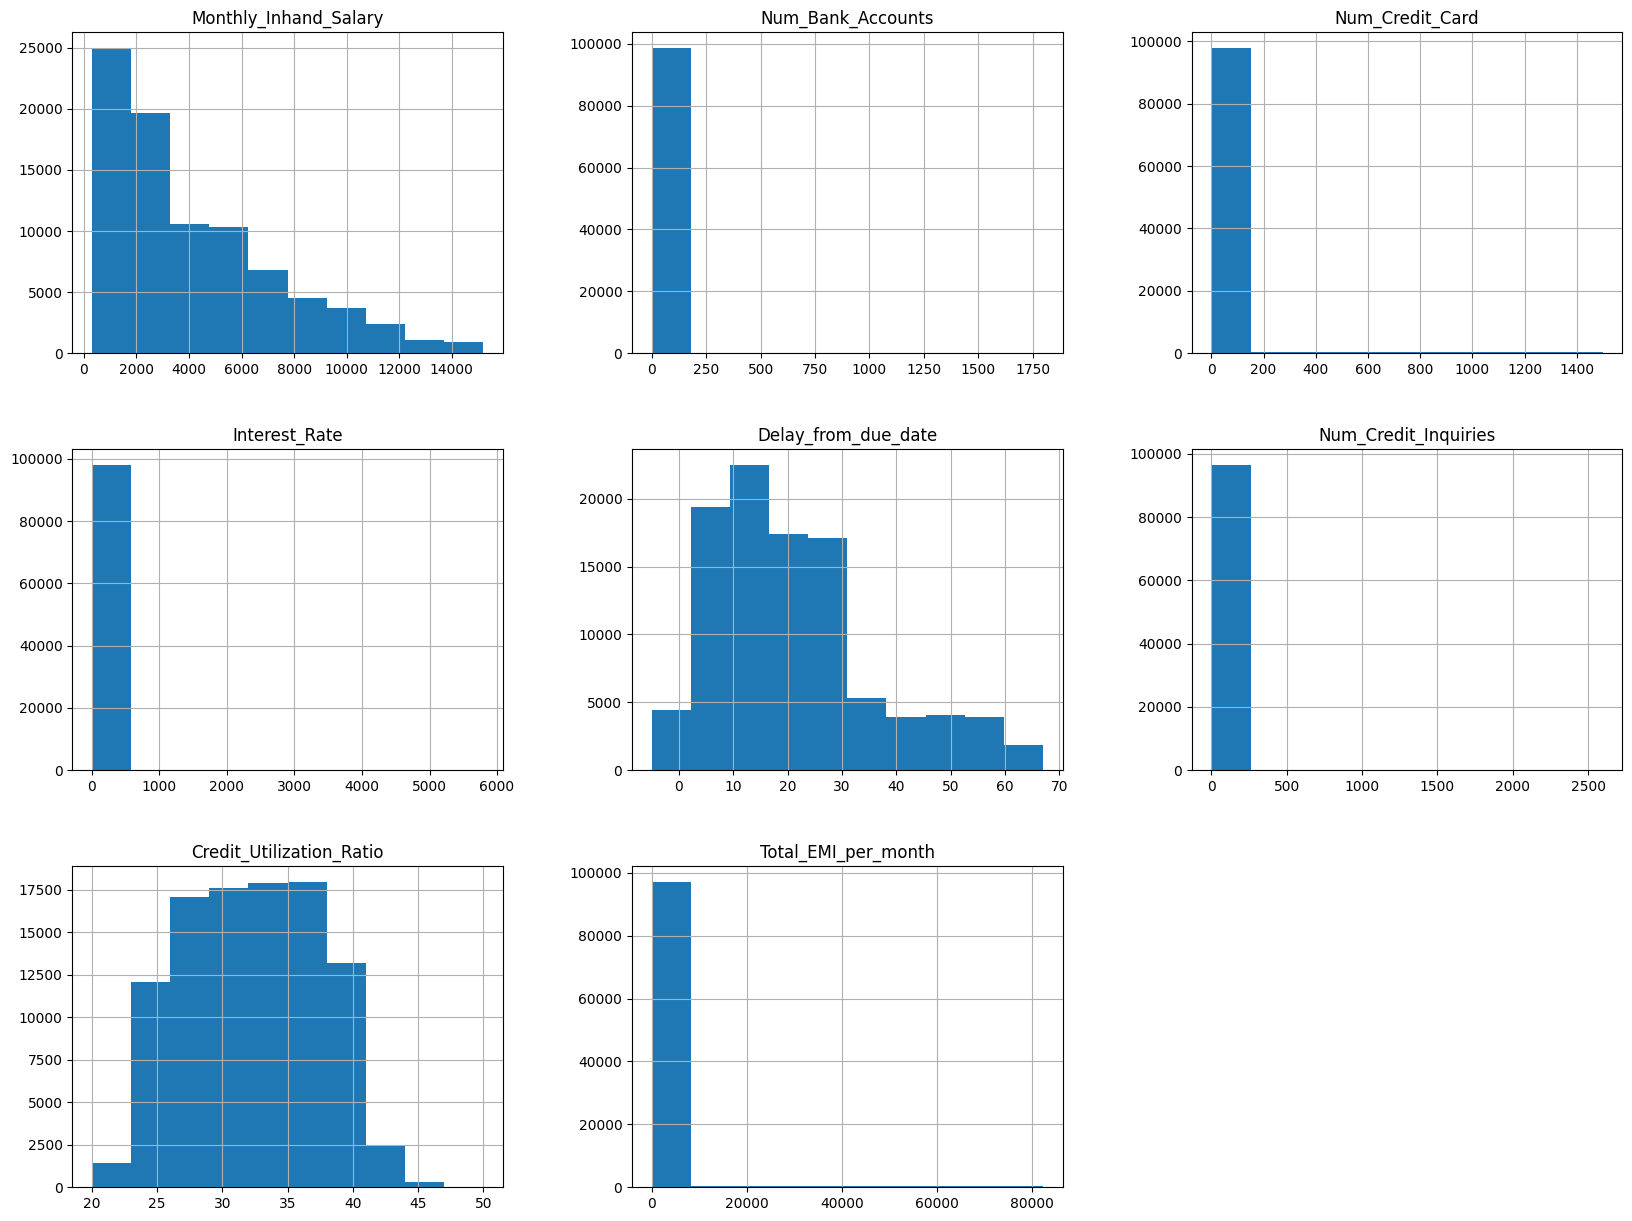

In [78]:
train.hist(figsize=(20,15))
plt.show()

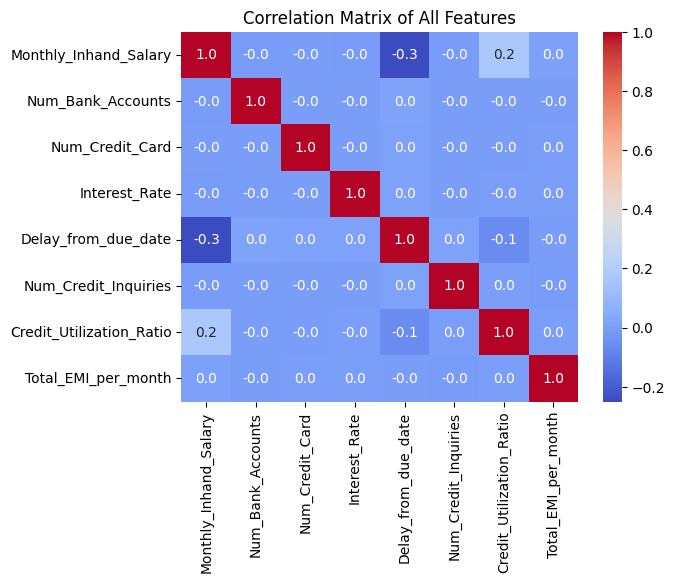

In [79]:
corr_matrix = train.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix of All Features')
plt.show()

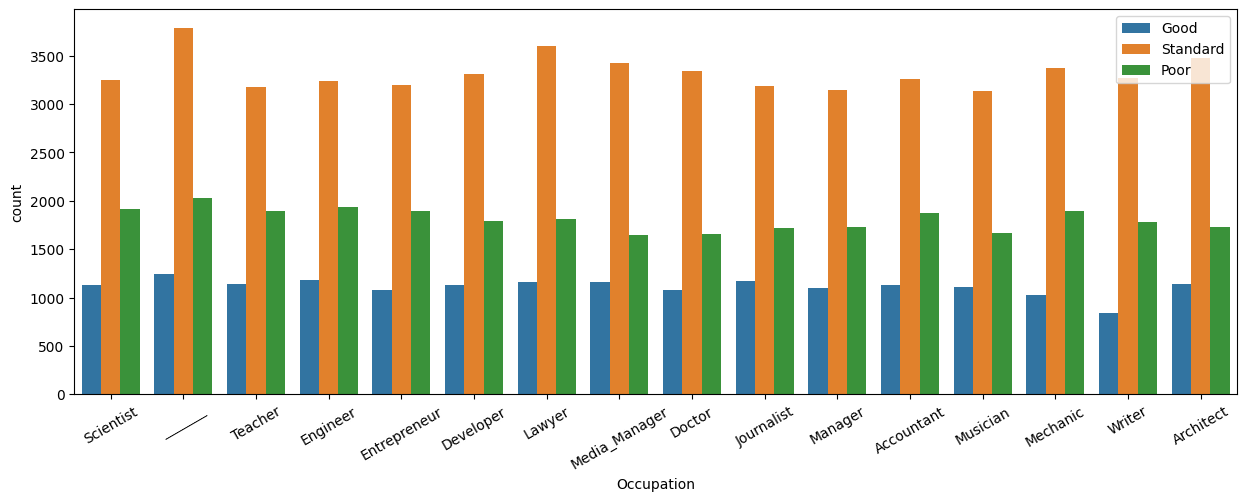

In [80]:
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='Occupation', hue='Credit_Score')
plt.legend()
plt.xticks(rotation=30)
plt.show()

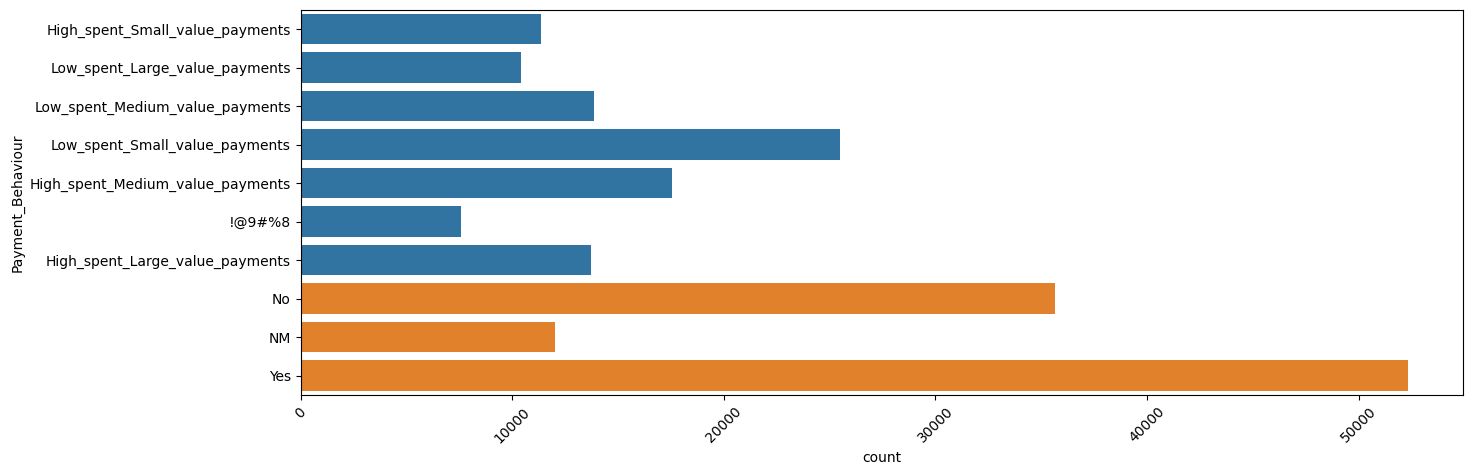

In [81]:
plt.figure(figsize=(15,5))
sns.countplot(train['Payment_Behaviour'])
plt.xticks(rotation=45)
sns.countplot(train['Payment_of_Min_Amount'])
plt.xticks(rotation=45)
plt.show()

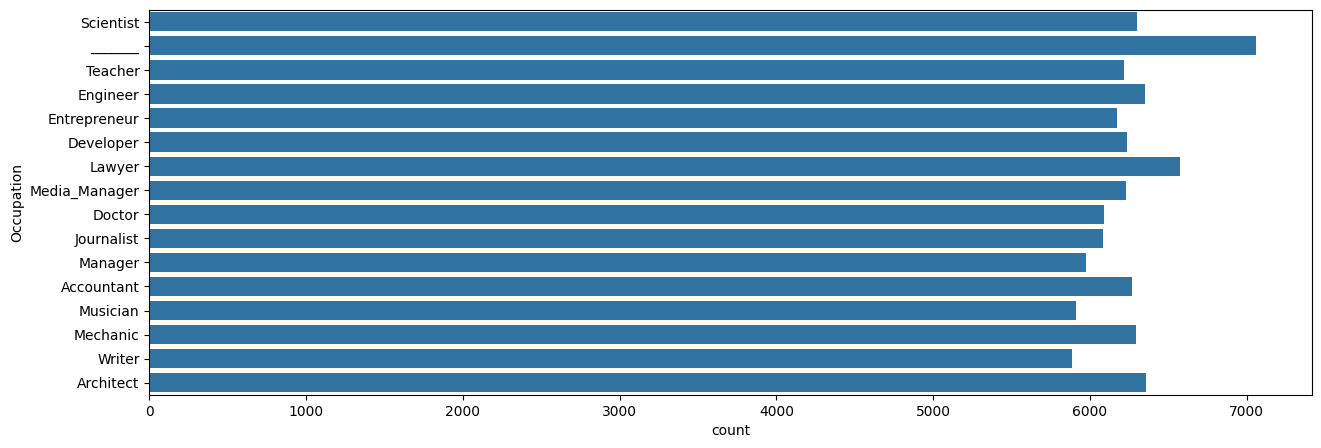

In [82]:
plt.figure(figsize=(15,5))
sns.countplot(train['Occupation'])
plt.show()

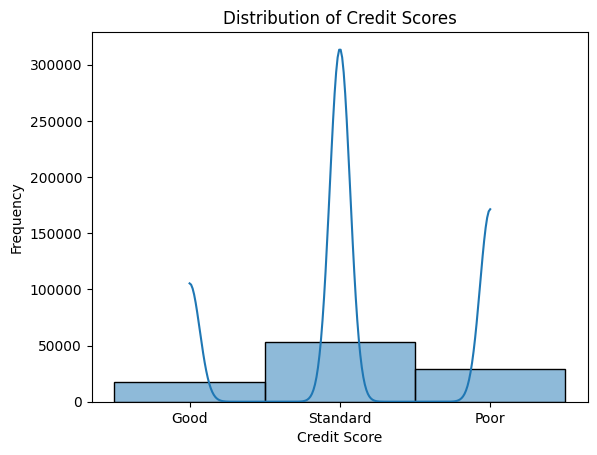

In [83]:
sns.histplot(train['Credit_Score'], bins=30, kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

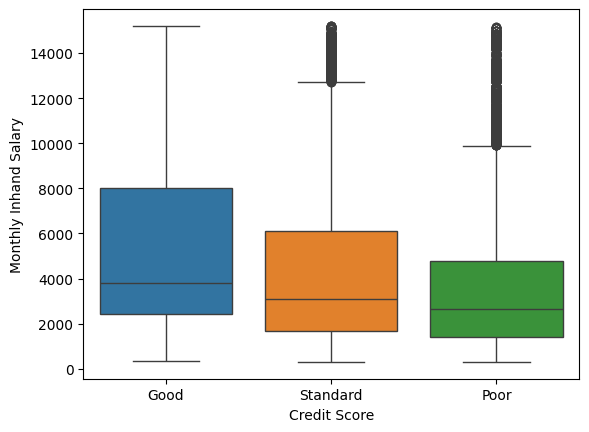

In [84]:
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=train, hue = 'Credit_Score')
plt.xlabel('Credit Score')
plt.ylabel('Monthly Inhand Salary')
plt.show()

----------------

# `04` Data Preparation

In [85]:
train.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Month', 'Credit_History_Age'], axis=1, inplace=True)

In [86]:
train["Age"] = train["Age"].str.replace('_', '').astype(float)
train.loc[(train["Age"] < 18) | (train["Age"] > 100), "Age"] = np.nan

In [87]:
train["Occupation"] = train["Occupation"].replace("_______" ,np.nan).astype(str)
train["Annual_Income"] = train["Annual_Income"].astype(str).str.replace("_" , "").astype("float")

In [88]:
train.loc[train["Num_Bank_Accounts"] > 25, "Num_Bank_Accounts"] = np.nan
train.loc[train["Num_Credit_Card"] > 25, "Num_Credit_Card"] = np.nan
train.loc[train["Interest_Rate"] > 25,"Interest_Rate"] = np.nan

In [89]:
train["Num_of_Loan"] = pd.to_numeric(train["Num_of_Loan"].replace({"_": np.nan, "-": np.nan}), errors='coerce').astype(float)
train.loc[(train["Num_of_Loan"] > 25) | (train["Num_of_Loan"] < 0), "Num_of_Loan"] = np.nan

In [90]:
train["Num_of_Delayed_Payment"] = train["Num_of_Delayed_Payment"].astype(str).str.replace("_", "").str.replace("-", "")
train["Num_of_Delayed_Payment"] = pd.to_numeric(train["Num_of_Delayed_Payment"], errors='coerce')
train.loc[train["Num_of_Delayed_Payment"] > 50, "Num_of_Delayed_Payment"] = np.nan

In [91]:
train["Changed_Credit_Limit"] = train["Changed_Credit_Limit"].replace("_", np.nan)
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].astype(float)

In [92]:
train["Credit_Mix"] = train["Credit_Mix"].replace("_", np.nan).astype(str)
train["Outstanding_Debt"] = train["Outstanding_Debt"].str.replace("_" , "").astype("float")
train['Payment_of_Min_Amount'] = train['Payment_of_Min_Amount'].replace('NM', np.nan)

In [93]:
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].replace('__10000__', np.nan)
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].astype(float)

In [94]:
train["Payment_Behaviour"] = train["Payment_Behaviour"].replace("!@9#%8", np.nan)

In [95]:
train['Type_of_Loan'] = train['Type_of_Loan'].astype(str).str.replace(' and ', ', ')
train['Type_of_Loan'] = train['Type_of_Loan'].str.split(', ')
train['Type_of_Loan'] = train['Type_of_Loan'].apply(lambda x: [item.strip().rstrip(',') for item in x] if isinstance(x, list) else [])
mlb = MultiLabelBinarizer()
one_hot_encoded = pd.DataFrame(mlb.fit_transform(train['Type_of_Loan']), columns=mlb.classes_)
train = pd.concat([train, one_hot_encoded], axis=1).drop(columns=['Type_of_Loan','nan'])

In [96]:
train["Monthly_Balance"] = train["Monthly_Balance"].astype(str).str.replace(r'[^0-9.-]+', '').str.replace('_', '').str.replace('-', '').astype(float)
train["Monthly_Balance"] = train["Monthly_Balance"].round(2)

- encoding the objects

In [97]:
columns = ["Occupation", "Payment_of_Min_Amount", "Credit_Mix", "Payment_Behaviour"]
for i in columns:
    train[i] = LabelEncoder().fit_transform(train[i])
train[["Occupation", "Payment_of_Min_Amount", "Credit_Mix", "Payment_Behaviour"]].head()

,Occupation,Payment_of_Min_Amount,Credit_Mix,Payment_Behaviour
0,12,0,3,2
1,12,0,1,3
2,12,0,1,4
3,12,0,1,5
4,12,0,1,1


- split data to train and test

In [98]:
x = train.drop('Credit_Score', axis=1)
y = train['Credit_Score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [99]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 29)
(20000, 29)
(80000,)
(20000,)


## fill the missing values

In [100]:
knn_imputer = KNNImputer(n_neighbors=5)
simple_imputer = SimpleImputer(strategy='mean')


In [101]:
KnnImputer = KNNImputer(n_neighbors=5)
x_train = pd.DataFrame(KnnImputer.fit_transform(x_train), columns=x_train.columns)

x_train.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Monthly_Balance,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,41.0,11.0,70154.850,5696.237500,8.0,5.0,18.0,1.2,27.0,8.0,...,629.10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54.0,0.0,29508.410,2364.325500,7.0,4.0,9.0,1.0,18.0,15.4,...,448.70,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,19.0,14.0,31346.220,2453.838000,8.0,5.0,19.0,9.0,44.0,17.0,...,238.97,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
3,32.0,6.0,64901.370,5298.447500,3.0,5.0,20.0,0.0,15.0,17.6,...,691.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32.0,12.0,7200.035,540.002917,8.0,8.0,18.0,3.0,60.0,17.0,...,294.98,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [102]:
y_train = pd.DataFrame(y_train)
y_scaler = OrdinalEncoder()
y_train = pd.DataFrame(y_scaler.fit_transform(y_train), columns=["Credit_Score"])
y_train.head()

,Credit_Score
0,2.0
1,2.0
2,2.0
3,2.0
4,1.0


In [103]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=1234)

In [104]:
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(64000, 29)
(16000, 29)
(64000, 1)
(16000, 1)


In [105]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

`#` Prepare Test Set


In [106]:
KnnImputer = KNNImputer(n_neighbors=5)
x_test = pd.DataFrame(x_test)
x_test = pd.DataFrame(KnnImputer.fit_transform(x_test), columns=x_test.columns)

x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.534719,0.316171,-0.082203,0.307411,1.785905,1.184260,1.012389,1.427122,1.743309,1.564143,...,-0.109625,-0.663727,-0.683631,1.488433,-0.673489,-0.675990,1.470765,1.457319,1.488271,1.495135
1,1.083816,-0.113934,-0.117028,-0.636632,-0.530007,-0.744659,-0.280483,1.427122,-0.006214,1.078386,...,-0.109625,-0.663727,1.462777,1.488433,1.484805,1.479311,-0.679918,1.457319,1.488271,-0.668836
2,-1.242828,-0.974146,-0.113417,-0.976534,1.785905,2.148719,0.704563,0.603416,0.195654,0.916467,...,-0.109625,1.506644,1.462777,1.488433,-0.673489,-0.675990,1.470765,-0.686191,-0.671921,-0.668836
3,-1.040511,0.101119,-0.049776,1.518476,-1.301978,-0.358875,-1.511790,-0.137921,-0.611818,-1.674235,...,-0.109625,-0.663727,-0.683631,-0.671847,-0.673489,1.479311,1.470765,1.457319,-0.671921,-0.668836
4,0.375707,-0.974146,-0.090483,-0.125552,1.399920,2.148719,1.104737,0.603416,1.272284,1.240305,...,-0.109625,-0.663727,1.462777,-0.671847,1.484805,1.479311,-0.679918,-0.686191,1.488271,1.495135


In [107]:
y_test = pd.DataFrame(y_test)
y_test = pd.DataFrame(y_scaler.fit_transform(y_test), columns=["Credit_Score"])
y_test.head()

,Credit_Score
0,1.0
1,2.0
2,1.0
3,0.0
4,2.0


----------------

# `05` Deep learning model

- three hidden layers with 128 64 32 nodes respectively

In [152]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(3, activation='softmax'))
model1.summary()

c:\Users\Omar Elgema3y\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 128)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,275 (55.76 KB)

 Trainable params: 14,275 (55.76 KB)

 Non-trainable params: 0 (0.00 B)

In [154]:
earlystopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [155]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [156]:
history = model1.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=64, verbose=1, callbacks=[earlystopping]) 

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6339 - loss: 0.7939 - val_accuracy: 0.6802 - val_loss: 0.7106
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6777 - loss: 0.7163 - val_accuracy: 0.6874 - val_loss: 0.6970
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6889 - loss: 0.6941 - val_accuracy: 0.6981 - val_loss: 0.6805
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6972 - loss: 0.6792 - val_accuracy: 0.6981 - val_loss: 0.6797
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7023 - loss: 0.6691 - val_accuracy: 0.7008 - val_loss: 0.6703
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7065 - loss: 0.6592 - val_accuracy: 0.7016 - val_loss: 0.6720
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7141 - loss: 0.6463 - val_accuracy: 0.7072 - val_loss: 0.6624
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7238 - loss: 0

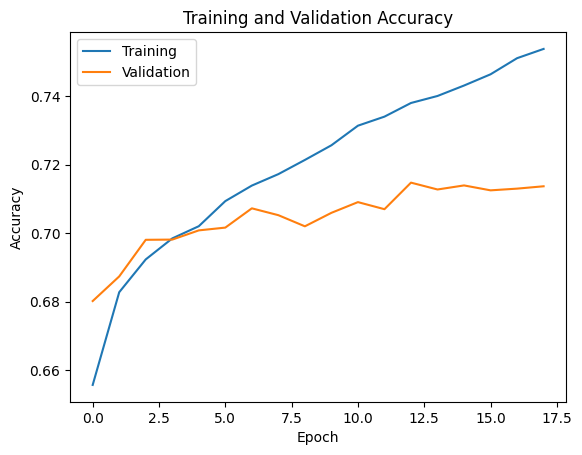

In [157]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

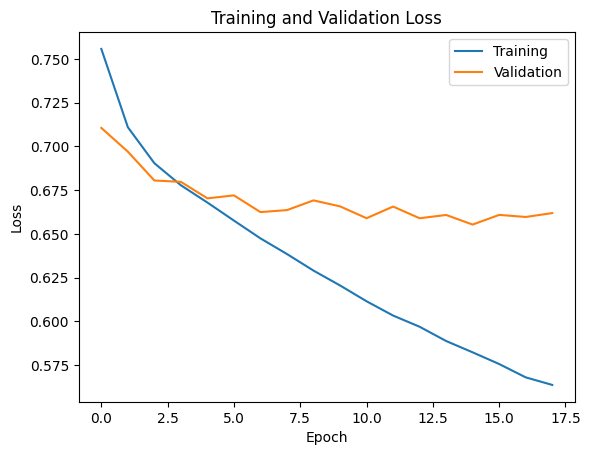

In [158]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()